# Analysis 1

## Some general analysis encountered during Data Cleaning

In [1]:
# Ignore warnings

import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
%matplotlib inline

In [3]:
# importing required libraries
import os
import sys
import subprocess
import stat
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")

In [4]:
# absolute path till parent folder
abs_path = os.getcwd()
path_array = abs_path.split("/")
path_array = path_array[:len(path_array)-1]
homefolder_path = ""
for i in path_array[1:]:
    homefolder_path = homefolder_path + "/" + i   

In [5]:
# path to clean data
clean_data_path = homefolder_path + "D:\Downloads\data-analysis-using-python-master\data-analysis-using-python-master\CleanData\CleanedDataSet\cleaned_autos.csv"

# reading csv into raw dataframe
df = pd.read_csv(clean_data_path,encoding="latin-1")

## Distribution of Vehicles based on Year of Registration

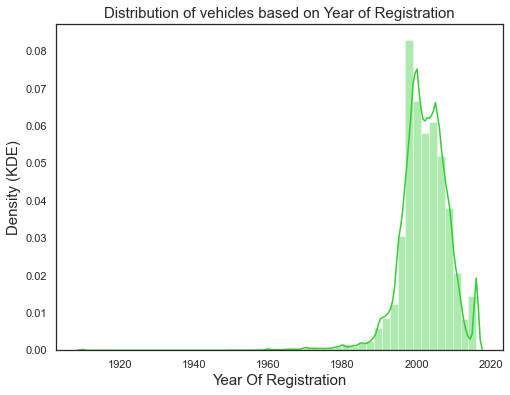

In [6]:
# Distribution of vehicles based on year of registration
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["yearOfRegistration"], color="#33cc33",kde=True, ax=ax)
ax.set_title('Distribution of vehicles based on Year of Registration', fontsize= 15)
plt.ylabel("Density (KDE)", fontsize= 15)
plt.xlabel("Year Of Registration", fontsize= 15)
plt.show()

In [7]:
# saving the plot
fig.savefig(abs_path + "/Plots/vehicle-distribution.png")

## Variation of the price range by the vehicle type

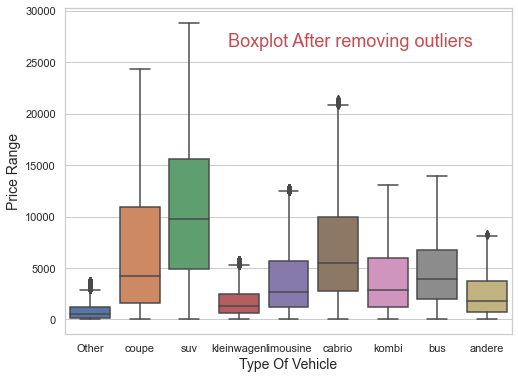

In [8]:
# Boxplot to see the distribution after outliers has been removed
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="vehicleType", y="price", data=df)
ax.text(5.25,27000,"Boxplot After removing outliers",fontsize=18,color="r",ha="center", va="center")
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':14})
ax.yaxis.set_label_text("Price Range",fontdict= {'size':14})
plt.show()

In [9]:
# saving the plot
fig.savefig(abs_path + "/Plots/price-vehicleType-boxplot.png")

## Total count of vehicles by type available on ebay for sale

C:\Users\mishr\anaconda3\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


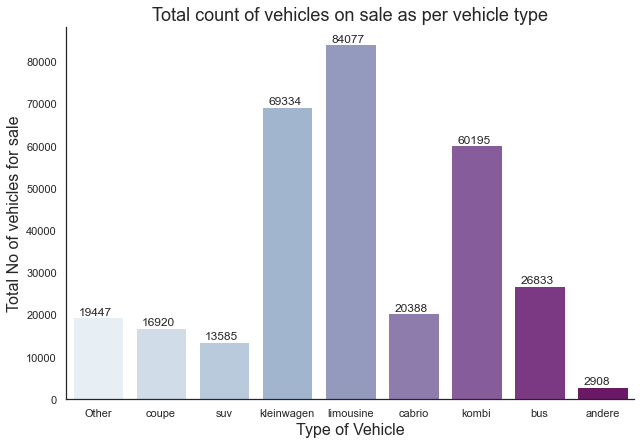

In [10]:
# Count plot to show the number of vehicles belonging to each vehicleType
sns.set_style("white")
g = sns.catplot(x="vehicleType", data=df, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
g.ax.xaxis.set_label_text("Type of Vehicle",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total No of vehicles for sale", fontdict= {'size':16})
g.ax.set_title("Total count of vehicles on sale as per vehicle type",fontdict= {'size':18})
# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

In [11]:
# saving the plot
g.savefig(abs_path + "/Plots/count-vehicleType.png")

# Analysis 2

## No of Vehicles by Brand Available on ebay for sale

C:\Users\mishr\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\mishr\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


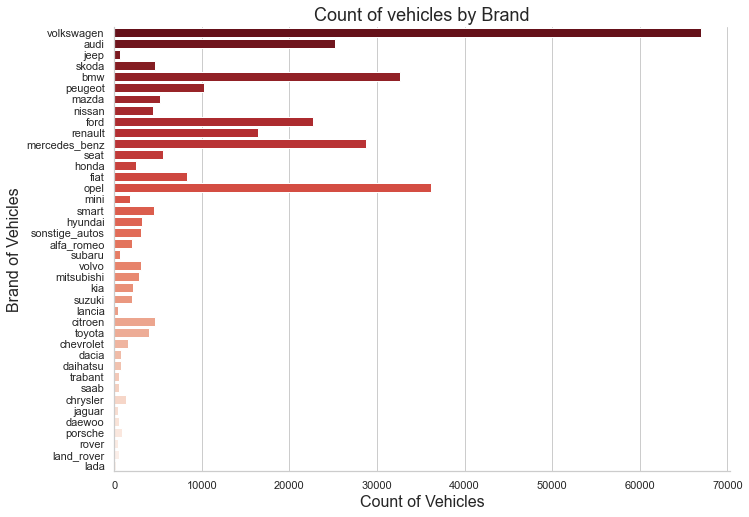

In [12]:
# Count plot to show the number of vehicles belonging to each brand
sns.set_style("whitegrid")
g = sns.factorplot(y="brand", data=df, kind="count",
                   palette="Reds_r", size=7, aspect=1.5)
g.ax.set_title("Count of vehicles by Brand",fontdict={'size':18})
g.ax.xaxis.set_label_text("Count of Vehicles",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Brand of Vehicles",fontdict= {'size':16})
plt.show()
# for p in g.ax.patches:
#      g.ax.annotate((p.get_width()), (p.get_width()-0.1, p.get_y()-0.1))

In [13]:
# saving the plot
g.savefig((abs_path + "/Plots/brand-vehicleCount.png"))

## Average price for vehicles based on the type of vehicle as well as on the type of gearbox

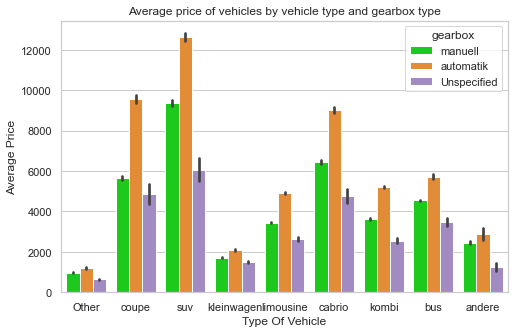

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="vehicleType", y="price",hue="gearbox", palette=colors, data=df)
ax.set_title("Average price of vehicles by vehicle type and gearbox type",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':12})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':12})
plt.show()

In [15]:
# saving the plot
fig.savefig((abs_path + "/Plots/vehicletype-gearbox-price.png"))

## Average price of vehicle by fuel type and gearbox type

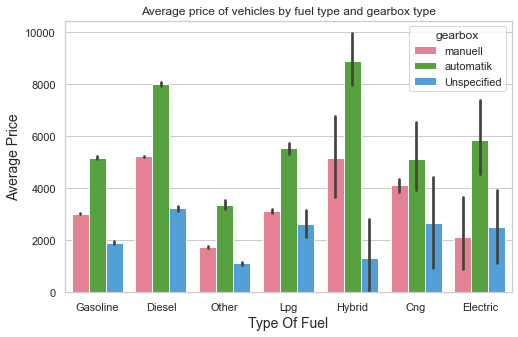

In [16]:
# barplot for price based on fuel type and gearbox type
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="fuelType", y="price",hue="gearbox", palette="husl",data=df)
ax.set_title("Average price of vehicles by fuel type and gearbox type",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
plt.show()

In [17]:
# saving the plot
fig.savefig((abs_path + "/Plots/fueltype-vehicleType-price.png"))

## Average power of a vehicle by vehicle type and gearbox type 

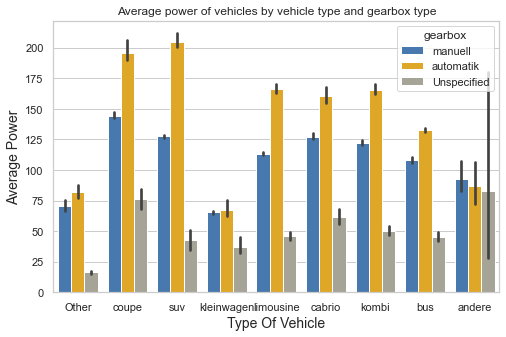

In [18]:
# barplot for price based on fuel type and gearbox type
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
fig, ax = plt.subplots(figsize=(8,5))
sns.set_palette(sns.xkcd_palette(colors))
sns.barplot(x="vehicleType", y="powerPS",hue="gearbox",data=df)
ax.set_title("Average power of vehicles by vehicle type and gearbox type",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Power",fontdict= {'size':14})
plt.show()

In [19]:
# saving the plot
fig.savefig((abs_path + "/Plots/vehicletype-fueltype-power.png"))

In [20]:
trial = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


## Average price of a vehicle by brand as well as vehicle type 

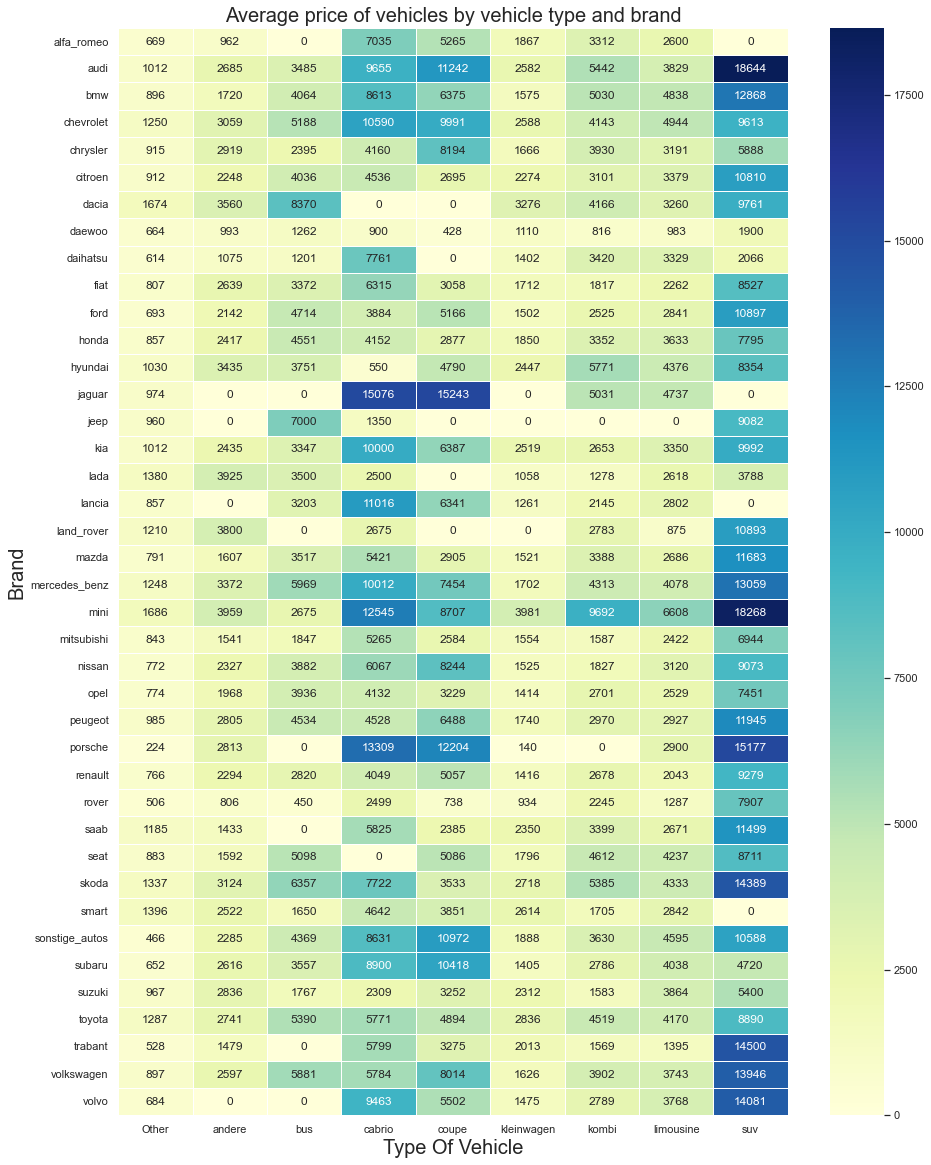

In [21]:
# HeatMap tp show average prices of vehicles by brand and type together
tri = trial.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Average price of vehicles by vehicle type and brand",fontdict={'size':20})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':20})
ax.yaxis.set_label_text("Brand",fontdict= {'size':20})
plt.show()

In [22]:
fig.savefig((abs_path + "/Plots/heatmap-price-brand-vehicleType.png"))

In [23]:
df.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


# Data Wrangling, Cleaning of Data, Exploration of Data to make it consistent for Analysis

In [24]:
# getting absolute path till the raw data file
abs_path = os.getcwd()[:-15]
raw_data_path = abs_path + r"C:\Users\mishr\data-analysis-using-python-master\RawData\autos.csv"

# reading csv into raw dataframe
df = pd.read_csv(raw_data_path,encoding="latin-1")

In [25]:
# checking the column vehicleType for null values 
df["vehicleType"].isnull().values.sum()

37869

In [26]:
# changing the vehicleType from NaN to Others
df["vehicleType"].fillna("Other", inplace=True)

In [27]:
# checking if there are any null values in the column brand
df["brand"].isnull().value_counts()

False    371528
Name: brand, dtype: int64

In [28]:
# checking if there are any null values in the column seller
df["seller"].isnull().value_counts()

False    371528
Name: seller, dtype: int64

In [29]:
# checking if there are any null values in the offerType 
df["offerType"].isnull().value_counts()

False    371528
Name: offerType, dtype: int64

In [30]:
# checking the different types of values in the column offerType
df["offerType"].unique()

array(['Angebot', 'Gesuch'], dtype=object)

In [31]:
# changing values of offerType Gesuch to Request and Angebot to Offer
df["offerType"] = df["offerType"].map({'Gesuch':"Request",'Angebot':'Offer'})

In [32]:
# checking if there are any null values in the yearOfRegistration
df["yearOfRegistration"].isnull().value_counts()

False    371528
Name: yearOfRegistration, dtype: int64

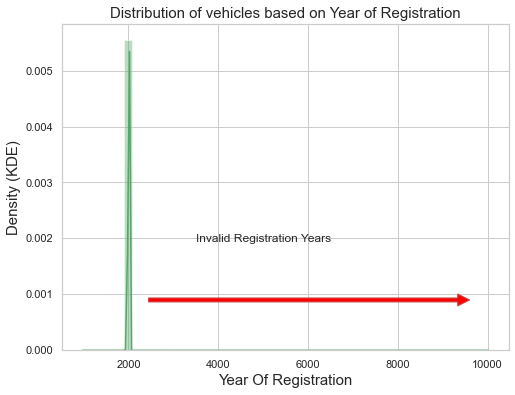

In [33]:
# Distribution of vehicles based on year of registration
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.distplot(df["yearOfRegistration"], color="g", ax=ax)
ax.set_title('Distribution of vehicles based on Year of Registration', fontsize= 15)
plt.ylabel("Density (KDE)", fontsize= 15)
plt.xlabel("Year Of Registration", fontsize= 15)
bbox_props = dict(boxstyle="larrow,pad=0.3", fc="white", ec="b", lw=2)
#ax.text(2500,0.015,"Maximum No Of Vehicles",ha="left", va="center", rotation=0,size=12,bbox=bbox_props)
ax.annotate('', xy=(25, 0.0009), xycoords='data',
                xytext=(1500, 0.0009), textcoords='data',
                arrowprops=dict(facecolor='red', shrink=0.05, ec="r"),
                ha='left', va='center',
                )
ax.annotate('', xy=(10000, 0.0009), xycoords='data',
                xytext=(2050, 0.0009), textcoords='data',
                arrowprops=dict(facecolor='red', shrink=0.05, ec="r"),
                horizontalalignment='center', verticalalignment='center',
                )
ax.text(5000,0.002,"Invalid Registration Years",ha="center", va="center")
plt.show()


In [34]:
fig.savefig(abs_path + r"D:\data-analysis-using-python-master\data-analysis-using-python-master\DataPreparation\Plots\vehicle-distribution1.png")

In [35]:
# dropping rows that are inconsistent with the dataset based on year of registration
df = df[(df["yearOfRegistration"] >= 1890) & (df["yearOfRegistration"] <= 2016)]

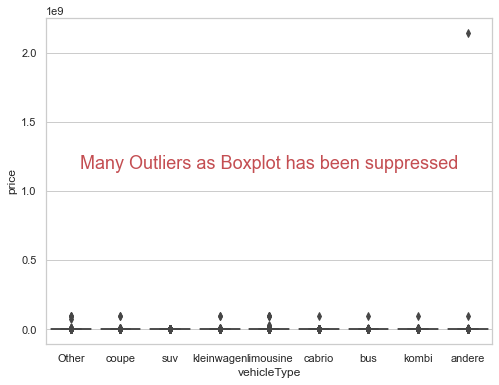

In [36]:
# Boxplot to see the distribution after outliers has been removed
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="vehicleType", y="price", data=df)
ax.text(4,1.2*(10**9),"Many Outliers as Boxplot has been suppressed",fontsize=18,color="r",ha="center", va="center")
plt.show()

In [37]:
fig.savefig(abs_path + "D:\Downloads\data-analysis-using-python-master\data-analysis-using-python-master\DataPreparation\Plots\price-vehicleType-boxplot.png")

In [38]:
# Mean of the prices of all the vehicle types
_median = df.groupby("vehicleType")["price"].median()

# 75th percentile of the prices of all the vehicles types
_quantile75 = df.groupby("vehicleType")["price"].quantile(0.75)

# 25th percentile of the prices of all the vehicles types
_quantile25 = df.groupby("vehicleType")["price"].quantile(0.25)

# Calculating the value of the prices of each vehicle type above which all the values are outliers
iqr = (_quantile75 - _quantile25)*1.5 + _median
iqr

vehicleType
Other          3708.000
andere         8429.500
bus           13948.500
cabrio        21400.000
coupe         24300.000
kleinwagen     5775.000
kombi         13076.875
limousine     12801.500
suv           28800.000
Name: price, dtype: float64

In [39]:
# Removing the outliers as per the logic above
df = df[((df["vehicleType"] == "andere") & (df["price"] <= 8429)) |
        ((df["vehicleType"] == "Other") & (df["price"] <= 3708)) |
        ((df["vehicleType"] == "suv") & (df["price"] <= 28800)) |
        ((df["vehicleType"] == "kombi") & (df["price"] <= 13076)) |
        ((df["vehicleType"] == "bus") & (df["price"] <= 13948)) |
        ((df["vehicleType"] == "cabrio") & (df["price"] <= 21400)) |
        ((df["vehicleType"] == "limousine") & (df["price"] <= 12801)) |
        ((df["vehicleType"] == "coupe") & (df["price"] <= 24300)) |
        ((df["vehicleType"] == "kleinwagen") & (df["price"] <= 5775))]

In [40]:
# checking if the gearbox column has null values
df["gearbox"].isnull().value_counts()

# setting the NaN gearbox types to Unspecified
df["gearbox"].fillna("Unspecified", inplace=True)

In [41]:
# checking if the fuelType has null values
df["fuelType"].isnull().value_counts()

False    288358
True      25329
Name: fuelType, dtype: int64

In [42]:
# setting the NaN fuelType types to other
df["fuelType"].fillna("other",inplace=True)

In [43]:
# checking how many unique types of fuelTypes are present
df["fuelType"].unique()

array(['benzin', 'diesel', 'other', 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [44]:
# Changing german names to english readable format
df["fuelType"] = df["fuelType"].map({'benzin':'Gasoline','diesel':'Diesel','other':'Other','lpg':'Lpg','hybrid':'Hybrid','cng':'Cng','elektro':'Electric'})

In [45]:
# deleting the column noOfPictures since all of them are Zero
del df["nrOfPictures"]

In [46]:
# splitting dateCreated by year
df["yearOfCreation"] = df['dateCreated'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%Y'))

# splitting dateCrawled by year
df["yearCrawled"] = df['dateCrawled'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%Y'))

# splitting dateCreated by month
df["monthOfCreation"] = df['dateCreated'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%B'))

# splitting dateCrawled by month
df["monthCrawled"] = df['dateCrawled'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%B'))

# no of days seen online
from_date = df['dateCreated'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())
to_date = df['lastSeen'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())
no_days = abs((to_date-from_date))
no_days = (no_days / np.timedelta64(1, 'D')).astype(int)
df["NoOfDaysOnline"] = no_days

# no of hrs seen online
hrs_from = df['dateCreated'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').time().strftime('%H'))
hrs_to = df['lastSeen'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').time().strftime('%H'))
total_hrs = (hrs_to.astype(int) - hrs_from.astype(int))
df["NoOfHrsOnline"] = total_hrs

In [47]:
# checking for null values in powerPS column
df["powerPS"].isnull().value_counts()

False    313687
Name: powerPS, dtype: int64

In [48]:
# checking for unique values in notRepairedDamage
df["notRepairedDamage"].unique()

array([nan, 'ja', 'nein'], dtype=object)

In [49]:
# setting nan in notRepairedDamage to other
df["notRepairedDamage"].fillna("other",inplace=True)

In [50]:
# Changing german names to english readable format
df["notRepairedDamage"] = df["notRepairedDamage"].map({'other':'Other','ja':'Yes','nein':'No'})

In [51]:
# checking for unique values in model column
df["model"].isnull().value_counts()

False    297078
True      16609
Name: model, dtype: int64

In [52]:
# setting nan in model column to Other
df["model"].fillna("Other",inplace=True)

In [53]:
# checking for null values in abtest column
df["abtest"].isnull().value_counts()

False    313687
Name: abtest, dtype: int64

In [54]:
# mappig the values on monthOfRegistration column from 1-12 
df["monthOfRegistration"].replace([0,12],[1,11],inplace=True)

In [55]:
# calculating no of years the vehicle is old
df["yearsOld"] = 2016 - df["yearOfRegistration"]

# calculating no of months the vehicle is old
df["monthsOld"] = 12 - df["monthOfRegistration"]


In [56]:
# mappig the values on monthOfRegistration column from 1-12 to Jan to Dec
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]
df["monthOfRegistration"].replace([1,2,3,4,5,6,7,8,9,10,11],months,inplace=True)

In [57]:
# checking if postal code values are null
df["postalCode"].isnull().value_counts()

False    313687
Name: postalCode, dtype: int64